In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
from sklearn.model_selection import GridSearchCV

# Data Import

In [3]:
df = pd.read_excel("D:/Trisem 5/AML/Final Assignment/Data/AML_PC_Data_Final_V3.xlsx")
df.head()

,Country Name,Country Cod,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,Monaco,MCO,yes,36686,21.55,7.14,1.30,NaN,6.30,99.0,8551109,54.15,0.622,0.04,11.86,0.000
1,Luxembourg,LUX,yes,640064,5.10,4.38,2.53,211.43,5.23,100.0,273924415,54.78,0.792,47.70,22.88,0.930
2,Bermuda,BMU,yes,63867,5.41,6.79,0.90,48.72,7.08,98.0,1169225,66.94,0.726,59.37,42.10,0.981
3,Ireland,IRL,yes,5033165,13.59,15.34,2.36,134.41,6.63,99.0,476670190,67.51,0.918,35.90,38.95,0.945
4,Switzerland,CHE,yes,8703405,4.22,10.13,0.58,71.37,5.32,99.0,11809503,54.87,0.897,62.06,35.87,0.962


In [4]:
#convert yes - 1 and no -0
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['PerCapitaabove10k']= label_encoder.fit_transform(df['PerCapitaabove10k'])

# Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country Name                                   194 non-null    object 
 1   Country Cod                                    194 non-null    object 
 2   PerCapitaabove10k                              194 non-null    int32  
 3   Population                                     194 non-null    int64  
 4   GDP Growth Rate                                194 non-null    float64
 5   GNI rate                                       194 non-null    float64
 6   Inflation rate                                 194 non-null    float64
 7   Export growth rate (% of GDP)                  181 non-null    float64
 8   Unemplument rate                               193 non-null    float64
 9   Literacy Rate                                  194 non

# Univariate Analysis

In [6]:
df.describe()

,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
count,194.000000,1.940000e+02,194.000000,194.000000,194.000000,181.000000,193.000000,194.000000,1.940000e+02,194.000000,194.000000,194.000000,179.000000,194.000000
mean,0.402062,3.213573e+07,5.080155,4.623273,8.894564,40.347845,8.668653,89.898616,8.889553e+07,63.979897,0.665108,76.248351,21.688527,0.724665
std,0.491583,1.105863e+08,6.156462,7.647503,31.526889,32.977576,6.080636,17.068554,3.207464e+08,5.998419,0.169981,18.880664,13.800163,0.162519
min,0.000000,1.120400e+04,-20.740000,-61.340000,-0.770000,-22.000000,0.260000,5.400000,0.000000e+00,48.680000,0.214000,0.040000,-49.410000,0.000000
25%,0.000000,1.279780e+06,2.470000,2.175000,2.007500,21.020000,4.380000,88.912500,3.750030e+05,60.807500,0.535000,67.155000,14.595000,0.609000
50%,0.000000,6.842433e+06,4.470000,5.025000,3.490000,32.930000,6.740000,98.500000,4.327798e+06,64.840000,0.691500,77.085000,21.310000,0.746000
75%,1.000000,2.671215e+07,7.355000,8.155000,5.785000,51.280000,11.460000,98.500000,2.232860e+07,67.497500,0.800000,87.247500,29.150000,0.845000
max,1.000000,1.412360e+09,41.750000,38.690000,382.820000,211.430000,28.390000,100.000000,2.827397e+09,83.100000,0.940000,149.410000,59.140000,0.981000


# Bi-Variate Analysis

In [7]:
df.corr()

,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
PerCapitaabove10k,1.000000,0.045833,0.117289,0.085995,-0.143200,0.400919,-0.226905,0.411418,0.029627,0.079683,0.651239,-0.441046,0.220731,0.606985
Population,0.045833,1.000000,0.016670,0.037958,0.002540,-0.136768,-0.110482,0.003995,-0.035824,0.191656,-0.035483,-0.063006,0.146845,0.013480
GDP Growth Rate,0.117289,0.016670,1.000000,0.537260,-0.041795,0.203612,0.063654,0.195235,0.035402,-0.078282,0.135163,-0.123268,0.050689,0.123263
GNI rate,0.085995,0.037958,0.537260,1.000000,-0.064138,0.055950,0.053823,0.002165,0.049343,0.020351,0.057102,0.040292,0.020185,0.100453
Inflation rate,-0.143200,0.002540,-0.041795,-0.064138,1.000000,-0.117968,0.172139,-0.108580,-0.000389,-0.088850,-0.169886,0.121032,-0.116984,-0.118842
Export growth rate (% of GDP),0.400919,-0.136768,0.203612,0.055950,-0.117968,1.000000,-0.046599,0.309961,0.093529,-0.074859,0.377266,-0.350094,0.223665,0.414015
Unemplument rate,-0.226905,-0.110482,0.063654,0.053823,0.172139,-0.046599,1.000000,0.071891,0.041211,-0.016545,-0.015493,0.118255,-0.165370,-0.073607
Literacy Rate,0.411418,0.003995,0.195235,0.002165,-0.108580,0.309961,0.071891,1.000000,-0.032961,0.067474,0.725482,-0.350430,0.380185,0.569518
Total Labor Force,0.029627,-0.035824,0.035402,0.049343,-0.000389,0.093529,0.041211,-0.032961,1.000000,0.037330,0.081957,0.050026,-0.085163,0.055738
Population ages 15-64 (% of total population),0.079683,0.191656,-0.078282,0.020351,-0.088850,-0.074859,-0.016545,0.067474,0.037330,1.000000,0.116153,-0.039030,-0.018731,0.160845


# BOX Plot

<AxesSubplot:>

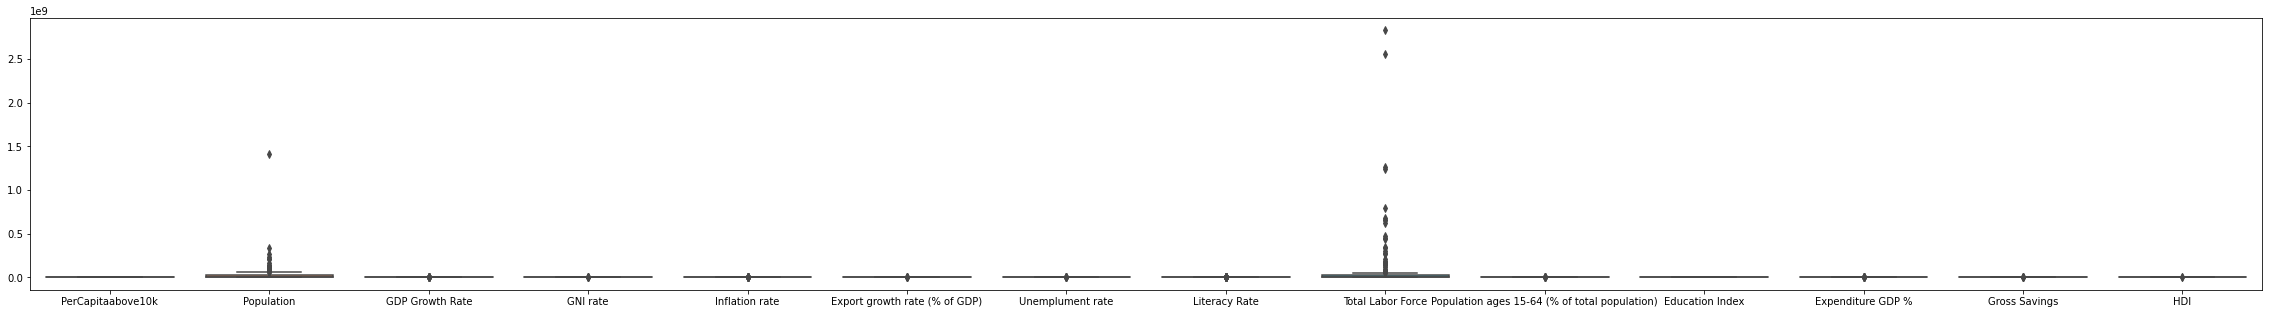

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40, 5))

sns.boxplot(data=df)

# Outlier Treatment

In [9]:
#Population
q1 = df['Population'].quantile(0.25)
q3 = df['Population'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-36868776.0, 64860708.0)

In [10]:
df['Population']=np.where(df['Population'] > high,high,df['Population']) # upper limit

In [11]:
#Total Labor Force
q1 = df['Total Labor Force'].quantile(0.25)
q3 = df['Total Labor Force'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low,high

(-32555391.75, 55258994.25)

In [12]:
df['Total Labor Force']=np.where(df['Total Labor Force'] > high,high,df['Total Labor Force']) # upper limit

<AxesSubplot:>

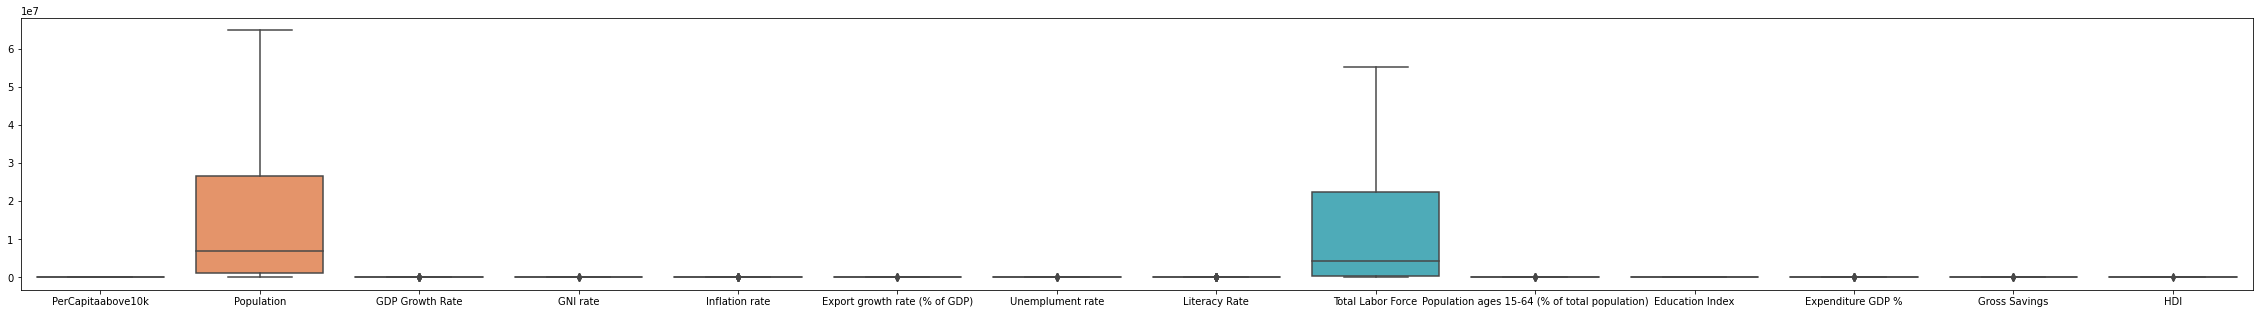

In [13]:
fig, ax = plt.subplots(figsize=(40, 5))
sns.boxplot(data=df)

In [14]:
df.head()

,Country Name,Country Cod,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,Monaco,MCO,1,36686.0,21.55,7.14,1.30,NaN,6.30,99.0,8551109.00,54.15,0.622,0.04,11.86,0.000
1,Luxembourg,LUX,1,640064.0,5.10,4.38,2.53,211.43,5.23,100.0,55258994.25,54.78,0.792,47.70,22.88,0.930
2,Bermuda,BMU,1,63867.0,5.41,6.79,0.90,48.72,7.08,98.0,1169225.00,66.94,0.726,59.37,42.10,0.981
3,Ireland,IRL,1,5033165.0,13.59,15.34,2.36,134.41,6.63,99.0,55258994.25,67.51,0.918,35.90,38.95,0.945
4,Switzerland,CHE,1,8703405.0,4.22,10.13,0.58,71.37,5.32,99.0,11809503.00,54.87,0.897,62.06,35.87,0.962


# Verify Null Value

In [15]:
df.isnull().sum()

Country Name                                      0
Country Cod                                       0
PerCapitaabove10k                                 0
Population                                        0
GDP Growth Rate                                   0
GNI rate                                          0
Inflation rate                                    0
Export growth rate (% of GDP)                    13
Unemplument rate                                  1
Literacy Rate                                     0
Total Labor Force                                 0
Population ages 15-64 (% of total population)     0
Education Index                                   0
Expenditure GDP %                                 0
Gross Savings                                    15
HDI                                               0
dtype: int64

In [16]:
df['Export growth rate (% of GDP)'].fillna(value=0, inplace=True)

In [17]:
df['Unemplument rate'].fillna(value=0, inplace=True)

In [18]:
df['Gross Savings'].fillna(value=0, inplace=True)

In [19]:
df.isnull().sum()

Country Name                                     0
Country Cod                                      0
PerCapitaabove10k                                0
Population                                       0
GDP Growth Rate                                  0
GNI rate                                         0
Inflation rate                                   0
Export growth rate (% of GDP)                    0
Unemplument rate                                 0
Literacy Rate                                    0
Total Labor Force                                0
Population ages 15-64 (% of total population)    0
Education Index                                  0
Expenditure GDP %                                0
Gross Savings                                    0
HDI                                              0
dtype: int64

# Drop Unnecessary Columns

In [20]:
df.drop(['Country Name', 'Country Cod'],axis = 1, inplace=True)
df.head()

,PerCapitaabove10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,1,36686.0,21.55,7.14,1.30,0.00,6.30,99.0,8551109.00,54.15,0.622,0.04,11.86,0.000
1,1,640064.0,5.10,4.38,2.53,211.43,5.23,100.0,55258994.25,54.78,0.792,47.70,22.88,0.930
2,1,63867.0,5.41,6.79,0.90,48.72,7.08,98.0,1169225.00,66.94,0.726,59.37,42.10,0.981
3,1,5033165.0,13.59,15.34,2.36,134.41,6.63,99.0,55258994.25,67.51,0.918,35.90,38.95,0.945
4,1,8703405.0,4.22,10.13,0.58,71.37,5.32,99.0,11809503.00,54.87,0.897,62.06,35.87,0.962


# Divide decision variable

In [21]:
inputs = df.drop('PerCapitaabove10k', axis = 'columns')
target = df.PerCapitaabove10k


# Split data - 70:30

In [22]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=.3,random_state=20)

print("Train Data Size - ",x_train.shape[0],'\n')
print("Test Data Size - ",x_test.shape[0],'\n')
 

Train Data Size -  135 

Test Data Size -  59 



In [23]:
x_test.head()

,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
28,271030.0,2.10,2.56,1.45,30.83,16.57,98.50,16883864.0,64.56,0.899,23.50,25.01,0.000
185,25252722.0,1.39,11.25,3.84,10.28,0.75,37.34,9902465.0,64.55,0.214,89.38,13.06,0.400
59,19493184.0,11.67,12.14,4.52,31.89,9.13,97.04,3356998.0,69.82,0.800,75.33,18.73,0.855
13,17533044.0,4.86,5.99,2.68,82.98,4.01,98.50,3042491.0,64.76,0.906,68.29,28.63,0.941
51,4520471.0,3.09,2.93,1.55,52.53,3.12,98.50,2971470.0,64.94,0.706,66.45,17.55,0.816


# ID3

In [24]:
modCart = DecisionTreeClassifier(criterion = 'entropy')
param_grid = {"max_depth":np.arange(3,13)}
grids = GridSearchCV(modCart,param_grid)
grids.fit(x_train,y_train)
tree_preds = grids.predict_proba(x_test)[:,-1]
tree_performabce = roc_auc_score(y_test,tree_preds)


print("DecisionTree: Area under the ROC curve - {}".format(tree_performabce))

DecisionTree: Area under the ROC curve - 0.8483709273182958


# ROC Plot

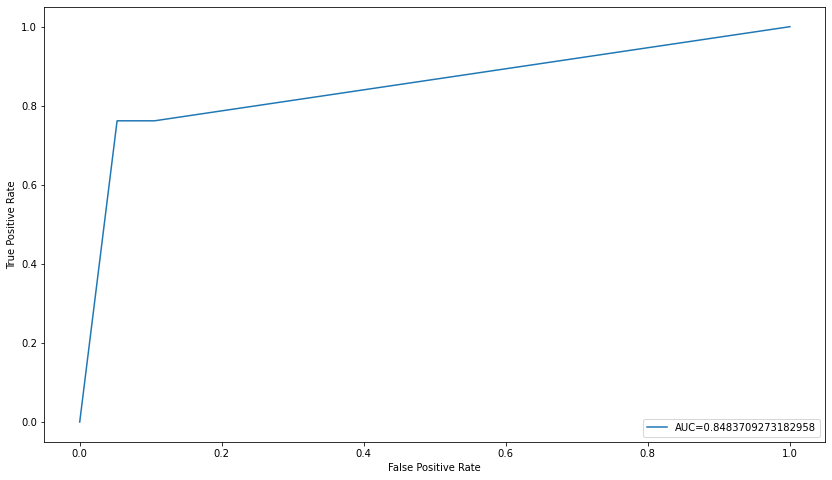

In [25]:
import matplotlib.pyplot as plt


fpr, tpr, _ = metrics.roc_curve(y_test,tree_preds)


#create ROC curve
plt.figure(figsize = (14,8))
plt.plot(fpr,tpr, label="AUC="+str(tree_performabce))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [26]:
grids.best_params_

{'max_depth': 4}

In [27]:
modCART = DecisionTreeClassifier(max_depth=4)
modCART.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

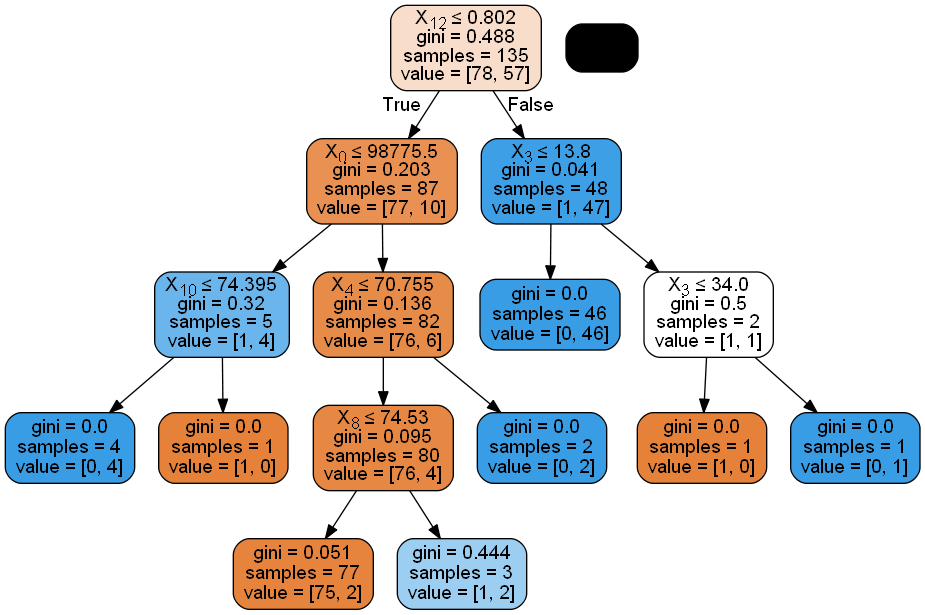

In [28]:
import graphviz
from six import StringIO
from  IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modCART,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

In [29]:
Y_pred=modCART.predict(x_test)
print(Y_pred)

[0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0]


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.8813559322033898


In [31]:
Actual=y_test
Predicted=Y_pred

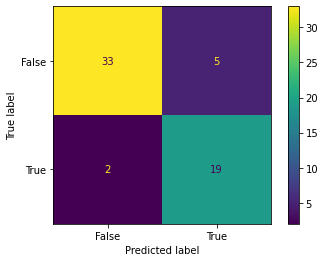

<Figure size 1008x720 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(Actual, Predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.figure(figsize = (14,10))

plt.show()

In [33]:
Y_train_pred=modCART.predict(x_train)
print(Y_train_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0]


In [34]:
print("Accuracy:",metrics.accuracy_score(y_train, Y_train_pred))

Accuracy: 0.9777777777777777


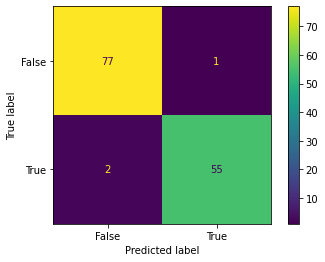

<Figure size 1008x720 with 0 Axes>

In [35]:
confusion_matrix = metrics.confusion_matrix(y_train, Y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.figure(figsize = (14,10))

plt.show()

# India Dataset Import

In [36]:
df2 = pd.read_excel("D:/Trisem 5/AML/Final Assignment/Data/Test_Data_Ind.xlsx")
df2.head()


,Country Name,Country Cod,Per Capita above 10k,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,India,IND,2256.59,1407563842,8.68,8.42,5.13,21.4,5.98,74.37,476670190,67.8,0.556,70.69,30.21,0.633


In [38]:
df2.drop(['Per Capita above 10k', 'Country Cod', 'Country Name' ], axis = 'columns', inplace = True )
df2.head()

,Population,GDP Growth Rate,GNI rate,Inflation rate,Export growth rate (% of GDP),Unemplument rate,Literacy Rate,Total Labor Force,Population ages 15-64 (% of total population),Education Index,Expenditure GDP %,Gross Savings,HDI
0,1407563842,8.68,8.42,5.13,21.4,5.98,74.37,476670190,67.8,0.556,70.69,30.21,0.633


In [39]:
#For India
Y_pred=modCART.predict(df2)
print(Y_pred)

[0]


In [40]:
newdf=pd.DataFrame()
newdf= df2

newdf["Predicted PERCAPita"]=Y_pred
print(newdf)

   Population  GDP Growth Rate  GNI rate  Inflation rate  \
0  1407563842             8.68      8.42            5.13   

   Export growth rate (% of GDP)  Unemplument rate  Literacy Rate  \
0                           21.4              5.98          74.37   

   Total Labor Force  Population ages 15-64 (% of total population)  \
0          476670190                                           67.8   

   Education Index  Expenditure GDP %  Gross Savings    HDI  \
0            0.556              70.69          30.21  0.633   

   Predicted PERCAPita  
0                    0  
